In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
features = pd.read_csv("C:/Users/viczh/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)
classes = pd.read_csv("C:/Users/viczh/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edges = pd.read_csv("C:/Users/viczh/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")

In [5]:
# first column: txId
# second column: timestep
# remaining 165 columns: features
colnames = ["txId", "timestep"] + [f"f_{i}" for i in range(165)]
features.columns = colnames

In [7]:
df = features.merge(classes, on="txId", how="left")

In [13]:
df = df[df["class"] != "unknown"]   # keep only labeled data
df = df.drop(columns=["txId"])

In [15]:
df["class"].unique()

array(['2', '1'], dtype=object)

In [23]:
df.head()

,timestep,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,class
3,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
9,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
10,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
16,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2


In [17]:
X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[ 813   96]
 [   1 8403]]

              precision    recall  f1-score   support

           1       1.00      0.89      0.94       909
           2       0.99      1.00      0.99      8404

    accuracy                           0.99      9313
   macro avg       0.99      0.95      0.97      9313
weighted avg       0.99      0.99      0.99      9313



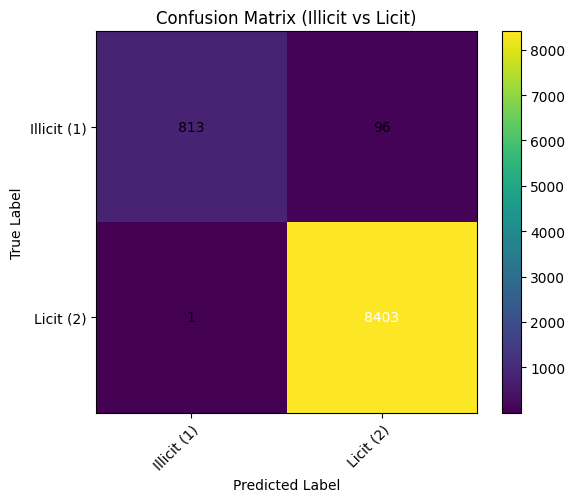

In [31]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Proper label names (per Kaggle dataset)
classes = ["Illicit (1)", "Licit (2)"]

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)

# Labeling
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    ylabel='True Label',
    xlabel='Predicted Label',
    title='Confusion Matrix (Illicit vs Licit)'
)

# Rotate x-tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Write numbers inside the cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()